# Lab 5: Merger Arbitrage Strategy


## Case Study: Elon Musk's Acquisition of Twitter (2022)

---

## Learning Objectives

By the end of this lab, you will be able to:
1. Understand the mechanics of merger arbitrage strategies
2. Calculate the arbitrage spread and annualized returns
3. Analyze deal risk and uncertainty through stock price movements
4. Implement a merger arbitrage trading strategy
5. Evaluate strategy performance and risk metrics

---

## Background: The Twitter Acquisition

In 2022, Elon Musk made headlines with his acquisition of Twitter. Here's the timeline:

- **April 14, 2022**: Elon Musk offers to buy Twitter at **$54.20 per share** (all-cash offer)
- **April 25, 2022**: Twitter's board accepts the $44 billion offer
- **May 13, 2022**: Musk tweets deal is "on hold" due to bot concerns (deal uncertainty period begins)
- **October 4, 2022**: Musk revives deal at original price
- **October 28, 2022**: Deal closes, Twitter delisted

### Merger Arbitrage Opportunity

When a company announces it will be acquired:
- The **target stock** (Twitter) typically jumps toward the offer price
- However, it usually trades **below** the offer price, creating a "spread"
- This spread represents the **deal risk** (uncertainty that deal might not close)
- Arbitrageurs profit by buying the stock and holding until deal closes

**Key Formula:**
$$\text{Arbitrage Spread} = \text{Offer Price} - \text{Current Stock Price}$$

$$\text{Annualized Return} = \left(\frac{\text{Offer Price}}{\text{Current Price}} - 1\right) \times \frac{365}{\text{Days to Close}}$$

In [ ]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
import warnings
warnings.filterwarnings("ignore")

# Set display options
pd.set_option('display.max_rows', 100)
pd.set_option('display.float_format', '{:.2f}'.format)
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (14, 6)

---
## Part 1: Load and Explore the Data

**Task 1.1**: Load the Twitter stock data from `TWTR.csv` and display the first and last 10 rows.

In [ ]:
# Task 1.1: Load Twitter stock data
twtr = pd.read_csv("./TWTR.csv", index_col = "Date", parse_dates = True)
print("============================================================")
print("Twitter Stock Data - First 10 rows:")
print(twtr.head(10))
print("============================================================")
print("Twitter Stock Data - Last 10 rows:")
print(twtr.tail(10))
print("============================================================")
print(f"Total trading days: {len(twtr)}")
print(f"Date range: {twtr.index[0].strftime('%Y-%m-%d')} to {twtr.index[-1].strftime('%Y-%m-%d')}")
print("============================================================")

Twitter Stock Data - First 10 rows:
            Close  Open  High   Low    Volume
Date                                         
2022-01-03  41.75 41.54 41.78 41.52   7008677
2022-01-04  38.04 38.22 38.42 37.90  11941722
2022-01-05  39.01 38.96 39.07 38.89  19062296
2022-01-06  40.24 40.47 40.72 39.78  18793153
2022-01-07  39.65 39.46 39.82 39.22  27159972
2022-01-10  37.08 36.40 37.21 36.22  19792904
2022-01-11  39.10 38.86 39.14 38.72  24557028
2022-01-12  37.93 37.87 38.08 37.52  21261117
2022-01-13  39.05 38.91 39.13 38.77  24302165
2022-01-14  40.85 41.23 41.52 40.83  22584979
Twitter Stock Data - Last 10 rows:
            Close  Open  High   Low    Volume
Date                                         
2022-10-17  51.93 51.78 52.29 51.42  20082327
2022-10-18  50.96 50.92 51.32 50.80  14718858
2022-10-19  52.06 52.32 52.54 51.72  10025826
2022-10-20  51.02 51.41 51.76 51.02  12823384
2022-10-21  51.15 51.31 51.33 51.04   9902892
2022-10-24  53.35 53.75 53.95 53.25  18096291
2022-10-2

---

**Task 1.2**: Calculate basic statistics for the Twitter stock price throughout 2022.

In [ ]:
# Task 1.2: Calculate basic statistics
close_mean = twtr["Close"].mean()
close_median = twtr["Close"].median()
close_min = twtr["Close"].min()
close_max = twtr["Close"].max()
close_std = twtr["Close"].std()
price_start = twtr["Close"].iloc[0]
price_end = twtr["Close"].iloc[-1]
return_total = (price_end - price_start) / price_start

print("============================================================")
print("Twitter Stock Price Statistics (2022):")
print("------------------------------------------------------------")
print(f"Mean Close Price: ${close_mean:.2f}")
print(f"Median Close Price: ${close_median:.2f}")
print(f"Min Close Price: ${close_min:.2f}")
print(f"Max Close Price: ${close_max:.2f}")
print(f"Standard Deviation: ${close_std:.2f}\n")
print(f"Price at start of year (Jan 3): ${price_start:.2f}")
print(f"Price at end of year (Oct 28): ${price_end:.2f}")
print(f"Total return (if held entire period): {(return_total * 100):.2f}%")
print("============================================================")

Twitter Stock Price Statistics (2022):
------------------------------------------------------------
Mean Close Price: $41.22
Median Close Price: $39.92
Min Close Price: $34.69
Max Close Price: $54.25
Standard Deviation: $4.56

Price at start of year (Jan 3): $41.75
Price at end of year (Oct 28): $53.70
Total return (if held entire period): 28.64%


---

**Task 1.3**: Plot the Twitter stock price for the entire period. Mark key dates with vertical lines:
- Announcement (April 14, 2022)
- Deal Accepted (April 25, 2022)
- Deal on Hold (May 13, 2022)
- Deal Revived (October 4, 2022)
- Deal Closed (October 28, 2022)

Also plot a horizontal line at the offer price ($54.20).

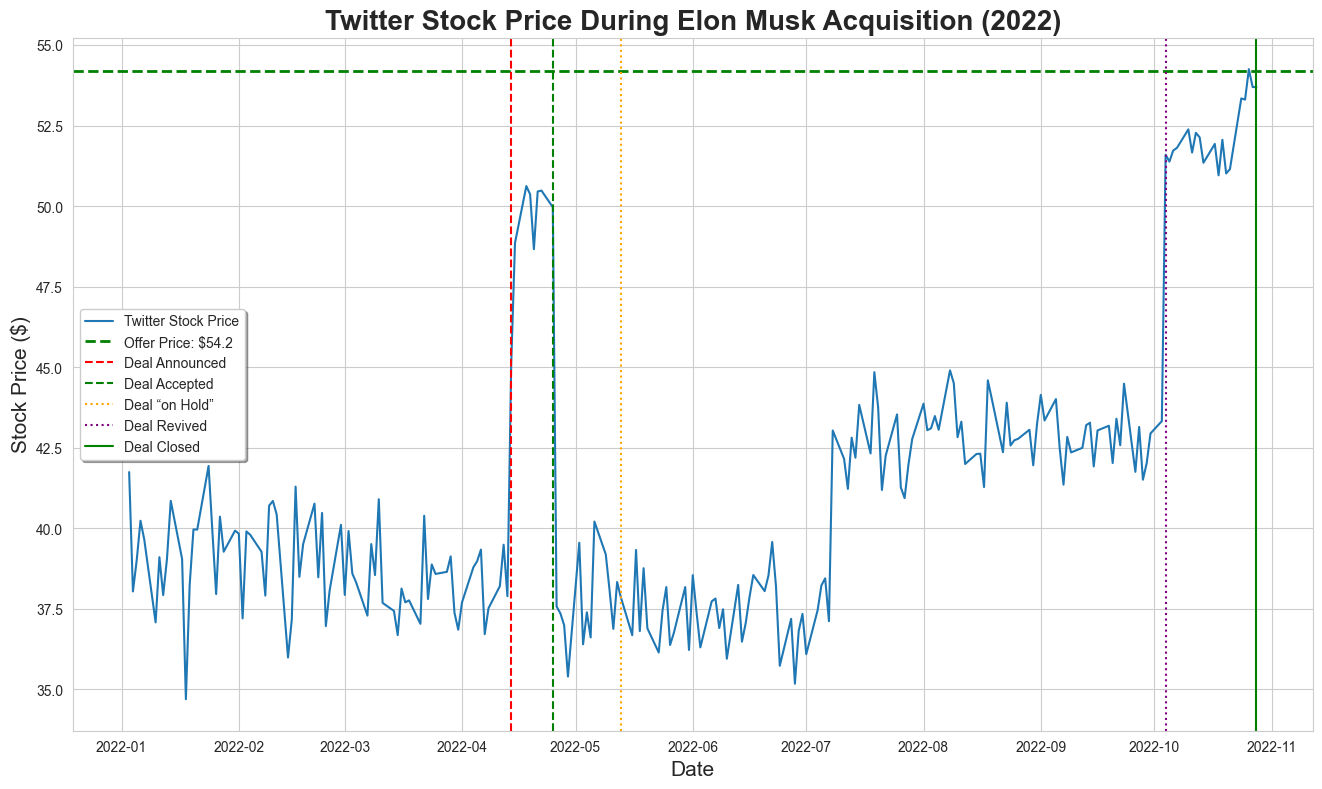

In [ ]:
# Task 1.3: Plot Twitter stock price with key events
deal_announced = "2024-04-14"
deal_accepted = "2024-04-25"
deal_on_hold = "2024-05-13"
deal_revived = "2024-10-04"
deal_closed = "2024-10-28"

price_offer = 54.2
key_dates = {
    "2022-04-14": ("Deal Announced", "red", "--"),
    "2022-04-25": ("Deal Accepted", "green", "--"),
    "2022-05-13": ("Deal “on Hold”", "orange", ":"),
    "2022-10-04": ("Deal Revived", "purple", ":"),
    "2022-10-28": ("Deal Closed", "green", "-")
}

def twitter_plot_price_with_key_events_2022(
    price_offer: float,
    key_dates: dict = None
) -> None:
    fig = plt.figure(figsize = (16, 9))
    ax = fig.add_subplot()

    ax.plot(twtr.index, twtr["Close"], label = "Twitter Stock Price")

    ax.axhline(y = price_offer, color = "g", linestyle = "--", linewidth = 2, label = f"Offer Price: ${price_offer}")
    
    for date, (statement, color, lstyle) in key_dates.items():
        date = datetime.strptime(date, "%Y-%m-%d")
        ax.axvline(x = date, color = color, linestyle = lstyle, label = f"{statement}")

    plt.grid(True, alpha = 0.3)
    plt.legend(loc = "center left", fancybox = True, shadow = True)
    plt.title("Twitter Stock Price During Elon Musk Acquisition (2022)", fontsize = 20, fontweight = "bold")
    plt.xlabel("Date", fontsize = 15)
    plt.ylabel(f"Stock Price ($)", fontsize = 15)
    plt.show()

twitter_plot_price_with_key_events_2022(price_offer = price_offer, key_dates = key_dates)

---
## Part 2: Analyze the Arbitrage Spread

**Task 2.1**: Calculate the arbitrage spread for each day after the announcement (April 14, 2022).

The spread is: **Offer Price ($54.20) - Current Stock Price**

In [ ]:
# Task 2.1: Calculate arbitrage spread
df = twtr.copy()
price_offer = np.array(54.20)

df["Offer_Price"] = price_offer
df["Spread"] = df["Offer_Price"] - df["Close"]
df["Spread_Percent"] = df["Spread"] / df["Close"] * 100

df = df[["Close", "Offer_Price", "Spread", "Spread_Percent"]]

spread_avg = df["Spread"].mean()
spread_max = df["Spread"].max()
spread_min = df["Spread"].min()
spread_percent_avg = df["Spread_Percent"].mean()
spread_percent_max = df["Spread_Percent"].max()
spread_percent_min = df["Spread_Percent"].min()
spread_announce = df["Spread"].loc["2022-04-14"]
spread_last = df["Spread"].iloc[-1]

print("=======================================================================")
print("Arbitrage Spread Analysis:")
print("-----------------------------------------------------------------------")
print(f"Average spread: ${spread_avg:.2f} ({(spread_percent_avg):.2f})%")
print(f"Maximum spread: ${spread_max:.2f} ({(spread_percent_max):.2f})%")
print(f"Minimum spread: ${spread_min:.2f} ({(spread_percent_min):.2f})%\n")
print(f"Spread on announcement day: ${spread_announce:.2f}")
print(f"Spread on last day: ${spread_last:.2f}")
print("=======================================================================")
print("First 10 days after announcement:")
print("-----------------------------------------------------------------------")
print(df[df.index >= "2022-04-14"].head(10))
print("=======================================================================")

Arbitrage Spread Analysis:
-----------------------------------------------------------------------
Average spread: $12.98 (32.94)%
Maximum spread: $19.51 (56.22)%
Minimum spread: $-0.05 (-0.10)%

Spread on announcement day: $9.12
Spread on last day: $0.50
First 10 days after announcement:
-----------------------------------------------------------------------
            Close  Offer_Price  Spread  Spread_Percent
Date                                                  
2022-04-14  45.08        54.20    9.12           20.23
2022-04-15  48.86        54.20    5.34           10.93
2022-04-18  50.63        54.20    3.57            7.06
2022-04-19  50.37        54.20    3.83            7.61
2022-04-20  48.67        54.20    5.53           11.37
2022-04-21  50.46        54.20    3.74            7.42
2022-04-22  50.49        54.20    3.71            7.36
2022-04-25  49.97        54.20    4.23            8.47
2022-04-26  37.57        54.20   16.63           44.25
2022-04-27  37.36        54.20   

**Task 2.2**: Plot the arbitrage spread over time. This shows how deal uncertainty evolved.

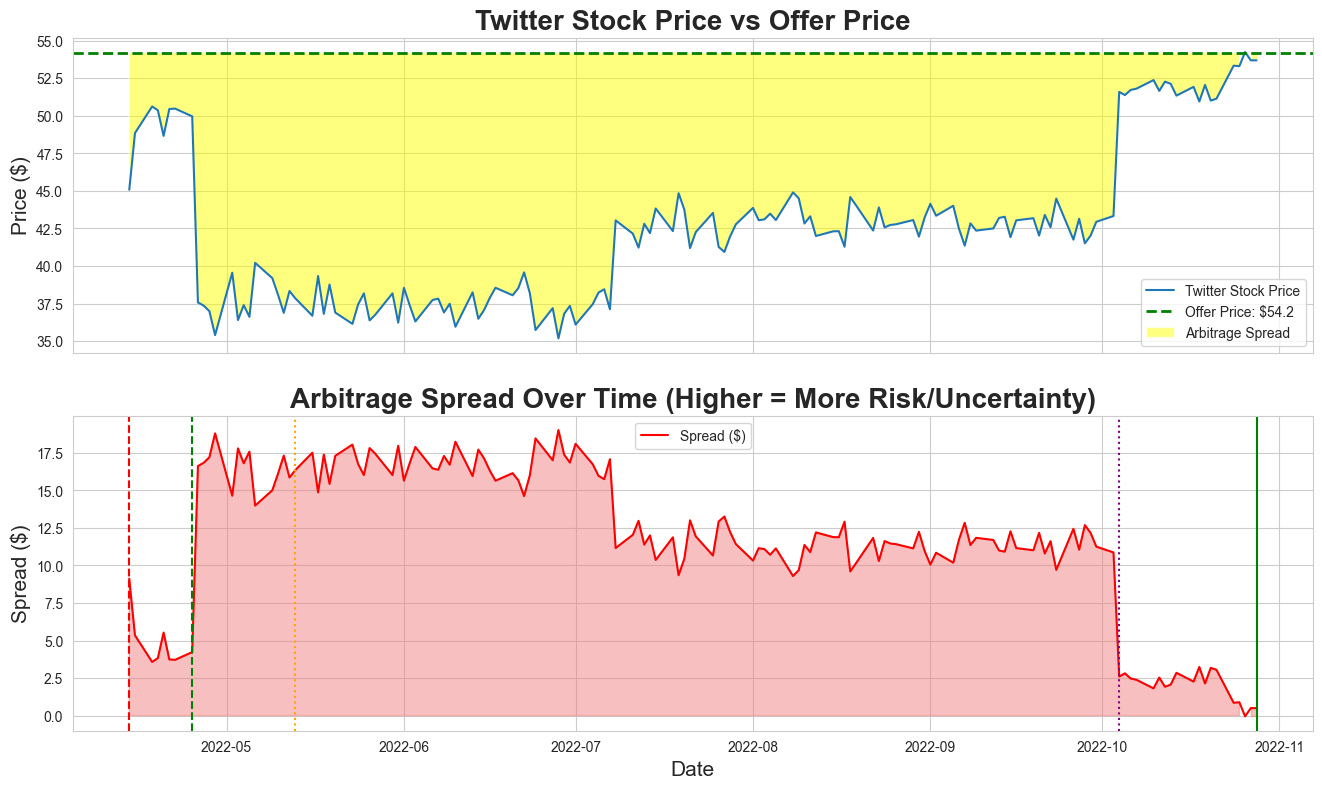

In [ ]:
# Task 2.2: Plot arbitrage spread

df_announce = df[df.index >= "2022-04-14"]

def arbitrage_spread_plot(
    df, 
    key_dates: dict,
    price_offer: float
) -> None:
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize = (16, 9), sharex = True)

    ax1.plot(df.index, df["Close"], label = "Twitter Stock Price")
    ax1.axhline(y = price_offer, color = "g", linestyle = "--", linewidth = 2, label = f"Offer Price: ${price_offer}")
    ax1.fill_between(
        df.index, 
        df["Close"], 
        price_offer, 
        where = (df["Close"] < price_offer), 
        facecolor = "yellow", 
        alpha = 0.5,
        label = "Arbitrage Spread"
    )
    ax1.set_title("Twitter Stock Price vs Offer Price", fontsize = 20, fontweight = "bold")
    ax1.set_ylabel("Price ($)", fontsize = 15)
    ax1.legend(loc = "lower right")

    ax2.plot(df.index, df["Spread"], color = "red", label = "Spread ($)")
    for date, (_, color, lstyle) in key_dates.items():
        date = datetime.strptime(date, "%Y-%m-%d")
        ax2.axvline(x = date, color = color, linestyle = lstyle)
    ax2.fill_between(
        df.index, 
        df["Spread"], 
        0, 
        where = (df["Spread"] >= 0), 
        color = "lightcoral", 
        alpha = 0.5
    )
    ax2.set_title("Arbitrage Spread Over Time (Higher = More Risk/Uncertainty)", fontsize = 20, fontweight = "bold")
    ax2.set_xlabel("Date", fontsize = 15)
    ax2.set_ylabel("Spread ($)", fontsize = 15)
    ax2.legend(loc = "upper center")

arbitrage_spread_plot(df_announce, key_dates = key_dates, price_offer = price_offer)

**Task 2.3**: Calculate the annualized return potential for each day, assuming the deal closes on October 28, 2022.

Formula: $\text{Annualized Return} = \left(\frac{\text{Offer Price}}{\text{Current Price}} - 1\right) \times \frac{365}{\text{Days to Close}}$

In [ ]:
# Task 2.3: Calculate annualized returns

price_offer = np.array(54.20)
deal_closed_date = datetime(2022, 10, 28)
df["Days_to_Close"] = (deal_closed_date - df.index).days
df["Annualized_Return"] = ((price_offer / df["Close"]) - 1) * (365 / df["Days_to_Close"]) * 100

annualized_avg = df["Annualized_Return"].mean()
annualized_max = df["Annualized_Return"].max()
annualized_min = df["Annualized_Return"].min()

key_dates_list = {
    "2022-04-14": "Offer Announced",
    "2022-04-25": "Deal Accepted", 
    "2022-05-13": "Deal On Hold",
    "2022-10-04": "Deal Revived",
    "2022-10-28": "Deal Closed"
}
print("================================================================================")
print("Annualized Return Analysis:")
print("--------------------------------------------------------------------------------")
print(f"Average annualized return: {annualized_avg:.2f}%")
print(f"Maximum annualized return: {annualized_max:.2f}%")
print(f"Minimum annualized return: {annualized_min:.2f}%")
print("================================================================================")
print("Annualized Return on Key Dates:")
print("--------------------------------------------------------------------------------")

for date_str, event_name in key_dates_list.items():
    date_data = df.loc[date_str]
    price = date_data["Close"]
    spread = date_data["Spread"]
    days_to_close = date_data["Days_to_Close"]
    annual_return = date_data["Annualized_Return"]

    print(f"{event_name} ({date_str}): ")
    print(f"Price: ${price:.2f}, Spread: ${spread:.2f}, Days to close: {days_to_close}, Annualized return: {annual_return:.2f}%")
    print()

print("================================================================================")

Annualized Return Analysis:
--------------------------------------------------------------------------------
Average annualized return: inf%
Maximum annualized return: inf%
Minimum annualized return: -18.03%
Annualized Return on Key Dates:
--------------------------------------------------------------------------------
Offer Announced (2022-04-14): 
Price: $45.08, Spread: $9.12, Days to close: 197.0, Annualized return: 37.48%

Deal Accepted (2022-04-25): 
Price: $49.97, Spread: $4.23, Days to close: 186.0, Annualized return: 16.61%

Deal On Hold (2022-05-13): 
Price: $37.85, Spread: $16.35, Days to close: 168.0, Annualized return: 93.82%

Deal Revived (2022-10-04): 
Price: $51.60, Spread: $2.60, Days to close: 24.0, Annualized return: 76.66%

Deal Closed (2022-10-28): 
Price: $53.70, Spread: $0.50, Days to close: 0.0, Annualized return: inf%



**Task 2.4**: Create a scatter plot showing the relationship between days to close and annualized return.

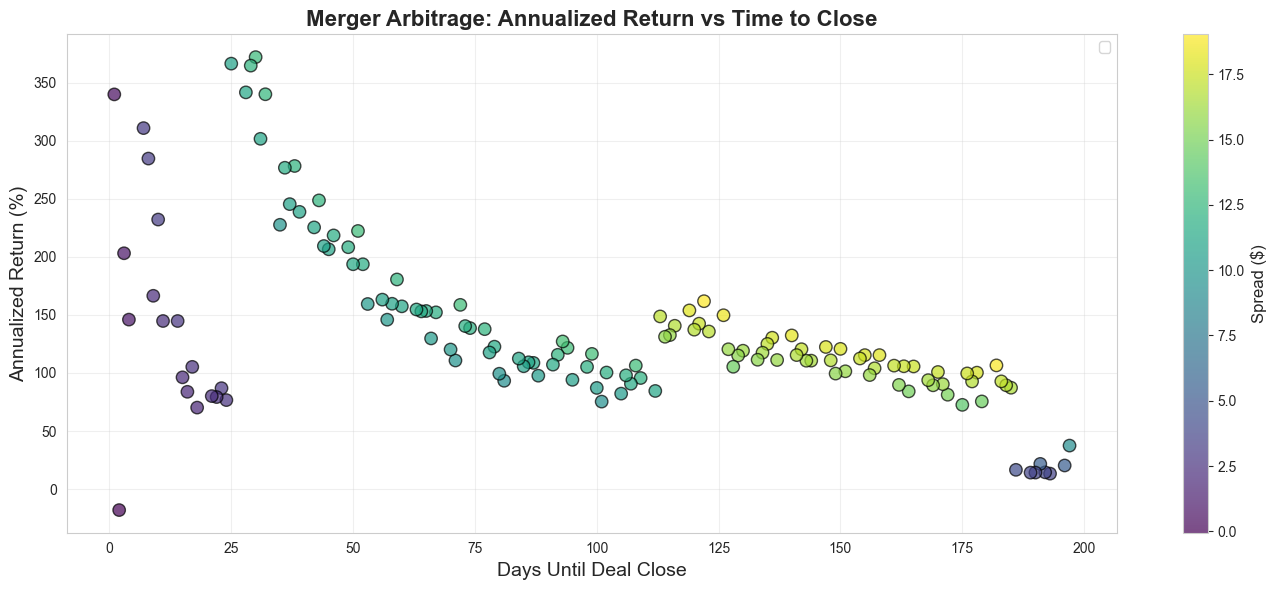

Interpretation:
- Higher annualized returns appear when there are more days until close (more time risk)
- Color intensity shows the spread - darker colors = larger spread = more risk


In [ ]:
# Task 2.4: Scatter plot of days to close vs annualized return

def CloseDay_AnnualReturn_plot():
    df_plot = df[df.index >= "2022-04-14"].copy()

    fig, ax = plt.subplots(figsize = (14, 6))

    scatter = ax.scatter(
        df_plot["Days_to_Close"],
        df_plot["Annualized_Return"],
        c = df_plot["Spread"],
        cmap = "viridis",
        alpha = 0.7,
        s = 80,
        edgecolor = "black",
        linewidth = 1
    )

    cbar = plt.colorbar(scatter, ax = ax)
    cbar.set_label("Spread ($)", fontsize = 12)

    ax.set_title("Merger Arbitrage: Annualized Return vs Time to Close", fontsize = 16, fontweight = "bold")
    ax.set_xlabel("Days Until Deal Close", fontsize = 14)
    ax.set_ylabel("Annualized Return (%)", fontsize = 14)
    
    ax.grid(True, alpha = 0.3)
    plt.tight_layout()
    plt.show()

    print("Interpretation:")
    print("- Higher annualized returns appear when there are more days until close (more time risk)")
    print("- Color intensity shows the spread - darker colors = larger spread = more risk")

CloseDay_AnnualReturn_plot()

---
## Part 3: Implement the Merger Arbitrage Strategy

**Task 3.1**: Implement a simple merger arbitrage strategy:
- **Enter**: Buy Twitter stock the day after the deal is announced (April 15, 2022)
- **Exit**: Sell on the day the deal closes (October 28, 2022) at the offer price

Calculate the total return and holding period.

In [ ]:
# Task 3.1: Simple buy-and-hold merger arbitrage

date_entry = datetime(2022, 4, 15)
date_exit = datetime(2022, 10, 28)
hold_period_day = (date_exit - date_entry).days
hold_period_month = hold_period_day / 30

price_entry = df["Close"].loc[date_entry]
price_exit = price_offer
return_total = (price_exit - price_entry) / price_entry
return_annual = return_total * (365 / hold_period_day)

spread_init = df["Spread"].loc[date_entry]
pnl_per_share = price_exit - price_entry

print("==================================================================")
print("Simple Merger Arbitrage Strategy: ")
print("------------------------------------------------------------------")
print(f"Entry Date: {date_entry.strftime('%Y-%m-%d')}")
print(f"Entry Price: ${price_entry:.2f}")
print(f"Exit Date: {date_exit.strftime('%Y-%m-%d')}")
print(f"Exit Price: ${price_exit:.2f}\n")
print(f"Holding Period: {hold_period_day} days ({hold_period_month:.1f} months)")
print(f"Total Return: {return_total * 100:.2f}%")
print(f"Annualized Return: {return_annual * 100:.2f}%\n")
print(f"Initial Spread: ${spread_init:.2f}")
print(f"Profit per share: ${pnl_per_share:.2f}")
print("==================================================================")

Simple Merger Arbitrage Strategy: 
------------------------------------------------------------------
Entry Date: 2022-04-15
Entry Price: $48.86
Exit Date: 2022-10-28
Exit Price: $54.20

Holding Period: 196 days (6.5 months)
Total Return: 10.93%
Annualized Return: 20.36%

Initial Spread: $5.34
Profit per share: $5.34


**Task 3.2**: Calculate what would have happened if you invested $100,000 in this strategy.

Also calculate the return of a buy-and-hold strategy starting January 3, 2022.

In [ ]:
# Task 3.2: Calculate profit on $100,000 investment

invest_init = 100_000

share_purchased_MAS = invest_init / price_entry
invest_value_final_MAS = share_purchased_MAS * price_exit
pnl_MAS = invest_value_final_MAS - invest_init
return_MAS = pnl_MAS / invest_init

date_hold = datetime(2022, 1, 3)

price_entry_BAH = df["Close"].loc[date_hold]
share_purchased_BAH = invest_init / price_entry_BAH
invest_value_final_BAH = share_purchased_BAH * price_exit
pnl_BAH = invest_value_final_BAH - invest_init
return_BAH = pnl_BAH / invest_init

MAS_extra_pnl = pnl_MAS - pnl_BAH

print("====================================================================")
print(f"Investment Analysis: ${invest_init:,}")
print("--------------------------------------------------------------------")
print("Merger Arbitrage Strategy (entered Apr 15): ")
print(f"    Shares purchased: {share_purchased_MAS:.2f}")
print(f"    Final value: ${invest_value_final_MAS:,.2f}")
print(f"    Profit: ${pnl_MAS:,.2f}")
print(f"    Return: {(return_MAS * 100):.2f}%")
print("--------------------------------------------------------------------")
print("Buy-and-Hold Strategy (from Jan 3): ")
print(f"    Entry price: ${price_entry_BAH:.2f}")
print(f"    Shares purchased: {share_purchased_BAH:.2f}")
print(f"    Final value: ${invest_value_final_BAH:,.2f}")
print(f"    Profit: ${pnl_BAH:,.2f}")
print(f"    Return: {(return_BAH * 100):.2f}%")
print("--------------------------------------------------------------------")
print("Comparison: ")
print(f"    Extra profit from merger arbitrage: ${MAS_extra_pnl:,.2f}")
print("    Holding period was 196 days shorter")
print("====================================================================")

Investment Analysis: $100,000
--------------------------------------------------------------------
Merger Arbitrage Strategy (entered Apr 15): 
    Shares purchased: 2046.74
    Final value: $110,933.27
    Profit: $10,933.27
    Return: 10.93%
--------------------------------------------------------------------
Buy-and-Hold Strategy (from Jan 3): 
    Entry price: $41.75
    Shares purchased: 2395.47
    Final value: $129,834.49
    Profit: $29,834.49
    Return: 29.83%
--------------------------------------------------------------------
Comparison: 
    Extra profit from merger arbitrage: $-18,901.22
    Holding period was 196 days shorter


**Task 3.3**: Analyze the drawdown during the holding period. What was the maximum loss if you had panic-sold at the worst time?

Drawdown Analysis (Unrealized Losses During Holding): 
---------------------------------------------------------------------
Entry value: $100,000.00

Maximum Drawdown: 
    Date: 2022-06-28 00:00:00
    Stock price: $35.18
    Portfolio value: $71,996.08
    Unrealized loss: $-28,003.92 (-28.00%)
---------------------------------------------------------------------
This occur during the period when Musk tried to back out of the deal.
Investors who held through this uncertainty were rewarded when deal closed.


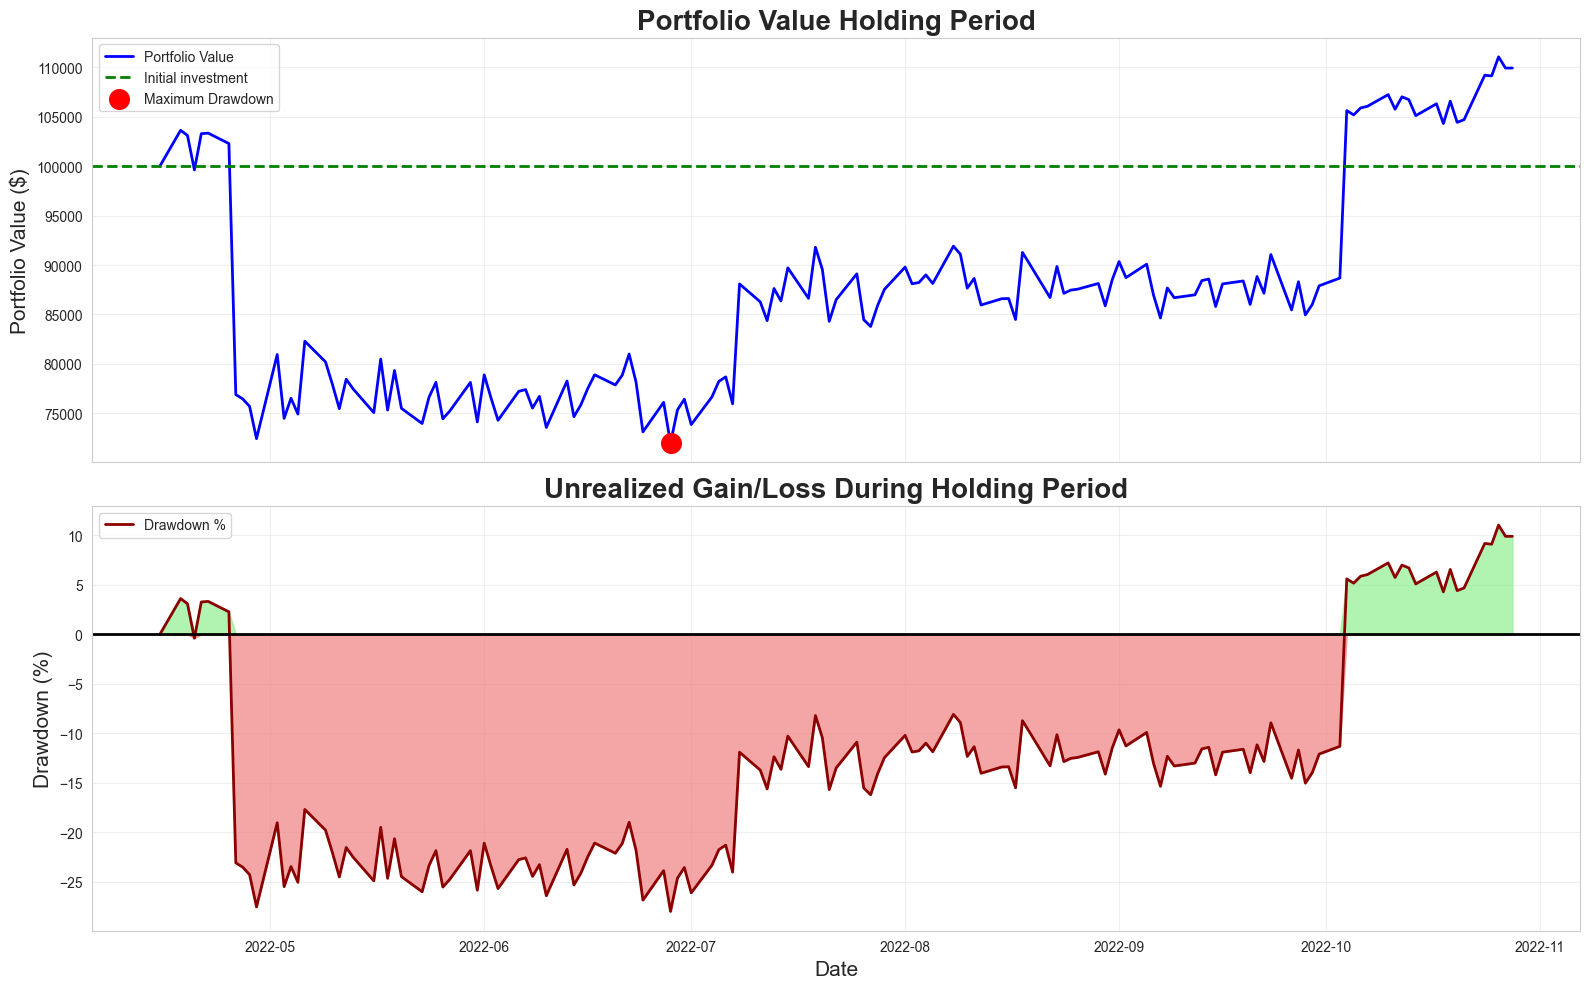

In [ ]:
# Task 3.3: Calculate drawdown (unrealized loss) during holding period

df_announce = df_announce[df_announce.index >= "2022-04-15"]

init_invest = 100_000
share_purchase = init_invest / df_announce["Close"].iloc[0]

df_announce["Portfolio_value"] = share_purchase * df_announce["Close"]
df_announce["Drawdown"] = ((df_announce["Portfolio_value"] - init_invest) / init_invest) * 100

drawdown_positive = df_announce["Drawdown"].copy()
drawdown_positive[drawdown_positive < 0] = 0
drawdown_negative = df_announce["Drawdown"].copy()
drawdown_negative[drawdown_negative > 0] = 0

drawdown_max_idx = df_announce["Drawdown"].idxmin()
drawdown_max_date = drawdown_max_idx
drawdown_max_price = df_announce["Close"].loc[drawdown_max_idx]
drawdown_max_value = df_announce["Portfolio_value"].loc[drawdown_max_idx]
drawdown_max_percent = df_announce["Drawdown"].loc[drawdown_max_idx]
unrealized_loss = drawdown_max_value - init_invest

print("=====================================================================")
print("Drawdown Analysis (Unrealized Losses During Holding): ")
print("---------------------------------------------------------------------")
print(f"Entry value: ${init_invest:,.2f}\n")
print("Maximum Drawdown: ")
print(f"    Date: {drawdown_max_date}")
print(f"    Stock price: ${drawdown_max_price:.2f}")
print(f"    Portfolio value: ${drawdown_max_value:,.2f}")
print(f"    Unrealized loss: ${unrealized_loss:,.2f} ({(drawdown_max_percent):.2f}%)")
print("---------------------------------------------------------------------")
print("This occur during the period when Musk tried to back out of the deal.")
print("Investors who held through this uncertainty were rewarded when deal closed.")
print("=====================================================================")

def drawdown_plot(df):
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize = (16, 10), sharex = True)

    ax1.plot(df.index, df["Portfolio_value"], linewidth = 2, color = "blue", label = "Portfolio Value")
    ax1.axhline(y = init_invest, color = "green", linestyle = "--", linewidth = 2, label = "Initial investment")
    ax1.scatter(drawdown_max_date, drawdown_max_value, color = "red", s = 200, zorder = 5, label = "Maximum Drawdown")

    ax1.set_title("Portfolio Value Holding Period", fontsize = 20, fontweight = "bold")
    ax1.set_ylabel("Portfolio Value ($)", fontsize = 15, )
    ax1.legend(loc = "upper left")
    ax1.grid(True, alpha = 0.3)

    ax2.plot(df.index, df["Drawdown"], color = "darkred", linewidth = 2, label = "Drawdown %")
    ax2.axhline(y = 0, color = "black", linestyle = "-", linewidth = 2)
    ax2.fill_between(
        df.index,
        drawdown_positive,
        0,
        color = "lightgreen",
        alpha = 0.7
    )
    ax2.fill_between(
        df.index,
        drawdown_negative,
        0,
        color = "lightcoral",
        alpha = 0.7
    )

    ax2.set_title("Unrealized Gain/Loss During Holding Period", fontsize = 20, fontweight = "bold")
    ax2.set_xlabel("Date", fontsize = 15)
    ax2.set_ylabel("Drawdown (%)", fontsize = 15)
    ax2.legend(loc = "upper left")
    ax2.grid(True, alpha = 0.3)

    plt.tight_layout()
    plt.show()

drawdown_plot(df_announce)

---
## Part 4: Risk Analysis

**Task 4.1**: Calculate daily returns and volatility during the holding period.

In [ ]:
# Task 4.1: Calculate volatility

holding_period = df_announce.loc["2022-04-15":"2022-10-28"].copy()
holding_period["Daily_Return"] = holding_period["Close"].pct_change() * 100
holding_period = holding_period.dropna()

return_daily_mean = holding_period["Daily_Return"].mean()
volatility_daily = holding_period["Daily_Return"].std()
volatility_annual = volatility_daily * np.sqrt(252)

return_best = holding_period["Daily_Return"].max()
return_worst = holding_period["Daily_Return"].min()

risk_free_rate = 0.02
sharpe_ratio = (return_annual - risk_free_rate) / (volatility_annual / 100)

print("===============================================================")
print("Risk Analysis During Holding Period: ")
print("---------------------------------------------------------------")
print(f"Mean daily return: {return_daily_mean:.3f}%")
print(f"Dailt volatility (std dev): {volatility_daily:.3f}%")
print(f"Annualized volatility: {volatility_annual:.2f}%\n")

print(f"Best daily gain: {return_best:.2f}%")
print(f"Worst daily loss: {return_worst:.2f}%\n")

print(f"Sharpe Ratio: {sharpe_ratio:.2f}")
print(f"(Annualized Return: {(return_annual * 100):.2f}%, Risk-free rate: {(risk_free_rate * 100):.1f}%, Volatility: {volatility_annual:.2f}%)")
print("===============================================================")


Risk Analysis During Holding Period: 
---------------------------------------------------------------
Mean daily return: 0.170%
Dailt volatility (std dev): 4.496%
Annualized volatility: 71.38%

Best daily gain: 19.09%
Worst daily loss: -24.81%

Sharpe Ratio: 0.26
(Annualized Return: 20.36%, Risk-free rate: 2.0%, Volatility: 71.38%)


**Task 4.2**: Create a histogram of daily returns to visualize the distribution.

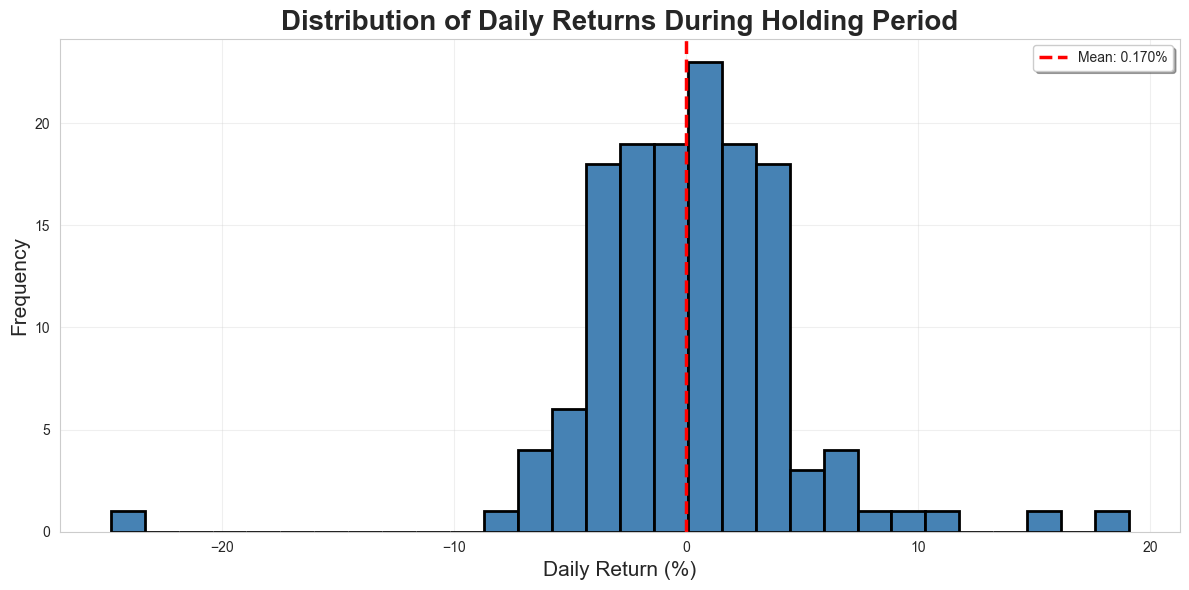

Distribution Statistics: 
Skewness: -0.257
Kurtosis: 8.704


In [ ]:
# Task 4.2: Histogram of daily returns

def return_daily_plot(df):

    returns_data = df["Daily_Return"]
    mean_return = returns_data.mean()
    std_return = returns_data.std()
    skewness = returns_data.skew()
    kurtosis = returns_data.kurtosis()

    fig = plt.figure(figsize = (12, 6))
    ax = fig.add_subplot()

    ax.hist(
        returns_data,
        bins = 30,
        color = "steelblue",
        edgecolor = "black",
        linewidth = 2
    )
    ax.axvline(x = mean_return / 100, color = "red", linestyle = "--", linewidth = 2.5, label = f"Mean: {return_daily_mean:.3f}%")

    ax.set_title("Distribution of Daily Returns During Holding Period", fontsize = 20, fontweight = "bold")
    ax.set_xlabel("Daily Return (%)", fontsize = 15)
    ax.set_ylabel("Frequency", fontsize = 15)
    ax.legend(loc = "upper right", fancybox = True, shadow = True)
    ax.grid(True, alpha = 0.3)
    
    plt.tight_layout()
    plt.show()

    print("Distribution Statistics: ")
    print(f"Skewness: {skewness:.3f}")
    print(f"Kurtosis: {kurtosis:.3f}")

return_daily_plot(holding_period)

**Task 4.3**: Identify the 5 days with the largest price movements and research what news might have caused them.

In [ ]:
# Task 4.3: Identify largest price movements

def five_largest_movement(df):
    df_full = df.copy()
    df_full["Daily_Return"] = df_full["Close"].pct_change() * 100
    df_full = df_full.dropna()

    largest_moves = df_full.nlargest(5, "Daily_Return", keep = "all")
    smallest_moves = df_full.nsmallest(5, "Daily_Return", keep = "all")

    all_extreme = pd.concat([largest_moves, smallest_moves])
    top_5_volatile = all_extreme.loc[all_extreme["Daily_Return"].abs().nlargest(5).index]
    top_5_volatile = top_5_volatile.reindex(top_5_volatile["Daily_Return"].abs().sort_values(ascending=False).index)    # Sort by absolute value in descending order.

    return top_5_volatile[["Close", "Daily_Return"]]

top_5_moves = five_largest_movement(holding_period)

print("=================================================================")
print("5 Largest Daily Price Movements: ")
print("-----------------------------------------------------------------")
print(top_5_moves)
print("-----------------------------------------------------------------")
print("Possible Explanations (based on news timeline): ")
print("- Large negative moves likely coincide with news of Musk trying to exit deal")
print("- Large positive moves likely coincide with news of deal progressing")
print("- During periods of high volatility, deal uncertainty was highest")
print("=================================================================")

5 Largest Daily Price Movements: 
-----------------------------------------------------------------
            Close  Daily_Return
Date                           
2022-04-26  37.57        -24.81
2022-10-04  51.60         19.09
2022-07-08  43.04         15.95
2022-05-02  39.55         11.74
2022-05-06  40.21          9.83
-----------------------------------------------------------------
Possible Explanations (based on news timeline): 
- Large negative moves likely coincide with news of Musk trying to exit deal
- Large positive moves likely coincide with news of deal progressing
- During periods of high volatility, deal uncertainty was highest


---
## Summary and Key Takeaways

### What We Learned:

1. **Merger Arbitrage Mechanics**: 
   - Target stock trades below offer price due to deal risk
   - The spread represents compensation for uncertainty
   - Profit realized when deal closes

2. **Risk Factors**:
   - Deal may not close (regulatory, financing, buyer backs out)
   - Time risk (longer timeframe = more uncertainty)
   - Market risk (stock can decline below entry price)

3. **Return Characteristics**:
   - Returns are typically modest but consistent (if deal closes)
   - Annualized returns depend on holding period
   - Risk-adjusted returns can be attractive

4. **Real-World Application**:
   - The Twitter deal had unusual uncertainty (Musk's on-off commitment)
   - This created wider spreads = higher potential returns
   - Investors who held through uncertainty were rewarded

### Strategy Suitability:

Merger arbitrage is suitable for:
- Risk-aware investors who can withstand volatility
- Those who can analyze deal probability
- Investors seeking diversification (uncorrelated with market)

**Not suitable for:**
- Risk-averse investors
- Those who cannot tolerate drawdowns
- Short-term traders (requires holding to deal close)

In [ ]:
# Final summary statistics

entry_date = date_entry.strftime("%Y-%m-%d")
entry_price = price_entry
exit_date = date_exit.strftime("%Y-%m-%d")
exit_price = price_exit
holding_days = hold_period_day

total_return = return_total * 100
annualized_return = return_annual * 100
max_dd_pct = drawdown_max_percent
annualized_volatility = volatility_annual

final_value = invest_value_final_MAS
profit = pnl_MAS

print("="*70)
print("FINAL SUMMARY: Twitter Merger Arbitrage (2022)")
print("="*70)
print(f"\nStrategy: Buy Twitter stock after announcement, hold until deal close")
print(f"Entry: {entry_date} at ${entry_price:.2f}")
print(f"Exit: {exit_date} at ${exit_price:.2f}")
print(f"\nResults:")
print(f"  Holding period: {holding_days} days")
print(f"  Total return: {total_return:.2f}%")
print(f"  Annualized return: {annualized_return:.2f}%")
print(f"  Maximum drawdown: {max_dd_pct:.2f}%")
print(f"  Volatility: {annualized_volatility:.2f}%")
print(f"  Sharpe ratio: {sharpe_ratio:.2f}")
print(f"\n  $100,000 investment → ${final_value:,.2f} (profit: ${profit:,.2f})")
print("="*70)

FINAL SUMMARY: Twitter Merger Arbitrage (2022)

Strategy: Buy Twitter stock after announcement, hold until deal close
Entry: 2022-04-15 at $48.86
Exit: 2022-10-28 at $54.20

Results:
  Holding period: 196 days
  Total return: 10.93%
  Annualized return: 20.36%
  Maximum drawdown: -28.00%
  Volatility: 71.38%
  Sharpe ratio: 0.26

  $100,000 investment → $110,933.27 (profit: $10,933.27)
